# Genetic Algorithm

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
def fitness(x,y):
    return x*(x-1)*np.cos(2*x-1)*np.sin(2*x-1)*(y-2)

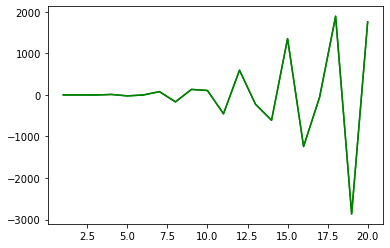

In [159]:
x = np.linspace(1, 20, num=20)
y = np.linspace(1, 20, num=20)
plt.plot(x, fitness(x, y), color='g')
plt.plot(y, fitness(x, y), color='g')

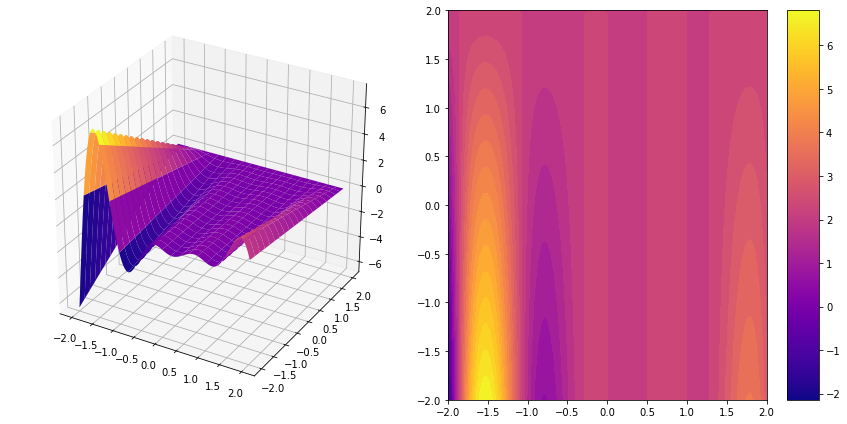

In [162]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

f = lambda x,y: fitness(x, y)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1,projection='3d')
xvalues = np.linspace(-2,2,100)
yvalues = np.linspace(-2,2,100)
xgrid, ygrid = np.meshgrid(xvalues, yvalues)
zvalues = f(xgrid, ygrid)
surf = ax.plot_surface(xgrid, ygrid, zvalues, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)
ax = fig.add_subplot(1,2,2)
plt.contourf(xgrid, ygrid, zvalues, 30, cmap=cm.plasma)
fig.colorbar(surf, aspect=12)
plt.tight_layout()

In [216]:
def individual(lower_bound=0, upper_bound=10, number_of_genes=2):
    return [np.random.uniform(lower_bound, upper_bound, 1)[0] for i in range(number_of_genes)]

def generate_initial_population(size):
    return [individual() for s in range(size)]

size = 10
x = generate_initial_population(10)

In [217]:
x

[[8.522593358349077, 4.547295407565598],
 [8.760456764025822, 6.241065621300855],
 [6.996494647985557, 6.309609274942765],
 [8.591195715779426, 4.39583740150955],
 [7.508056907466719, 9.25834592861677],
 [3.8323899341304535, 1.7927719236918127],
 [1.4853764136496372, 9.282874147856152],
 [3.6034241808282506, 4.812731820115196],
 [2.204483794778187, 6.326158763993199],
 [6.370714287990726, 2.8573038039589593]]

In [294]:
def get_parents(x, n_parents, fitness_function):
    # select n parent and sort descending 
    x.sort(key=lambda x: fitness_function(x[0], x[1]), reverse = True)
    #np.random.choice(x)
    return np.array(x[:n_parents])

In [295]:
# get 6 fittest parents
parents = get_parents(x, 6, fitness)

In [297]:
def crossover(parents, offspring_size=(3,3)):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[0]/2)
    for k in range(offspring_size[1]):
        # Index of the first parent to mate.
         parent1_idx = k%parents.shape[0]
         # Index of the second parent to mate.
         parent2_idx = (k+1)%parents.shape[0]
         # The new offspring will have its first half of its genes taken from the first parent.
         offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
         # The new offspring will have its second half of its genes taken from the second parent.
         offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring 

In [298]:
offspring = crossover(get_parents(x, 6, fitness), (3,3))

In [299]:
offspring

array([[8.76045676, 6.30960927, 6.30960927],
       [6.99649465, 4.3958374 , 4.3958374 ],
       [8.59119572, 4.54729541, 4.54729541]])

In [ ]:
def mutate()